In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [112]:
df = pd.read_csv('Data/housing_ca_cleaned.csv')

In [113]:
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'description', 'lat', 'long', 'state'],
      dtype='object')

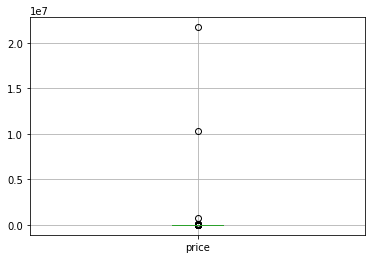

In [114]:
#Boxplot to determine whether it is needed to remove outliers
df.boxplot(column = ['price'])

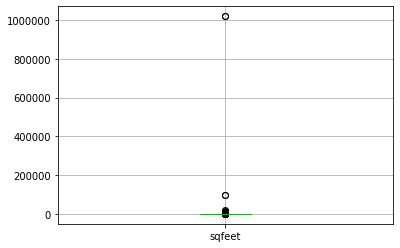

In [115]:
df.boxplot(column = ['sqfeet'])

In [116]:
#Remove outliers from possible variables
outlier_columns = ['price','sqfeet']
for i in range(0,2):
    for c in outlier_columns:
        df = df[((df[c] - df[c].mean()) / df[c].std()).abs() < 3]

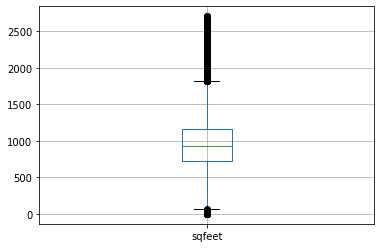

In [117]:
df.boxplot(column = ['sqfeet'])

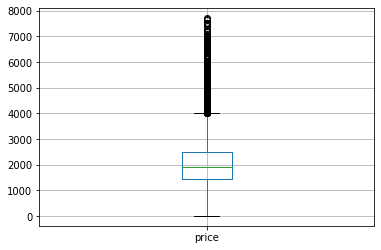

In [118]:
df.boxplot(column = ['price'])

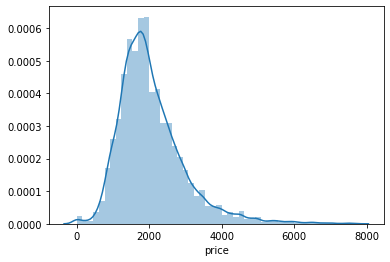

In [119]:
sns.distplot(df['price'])

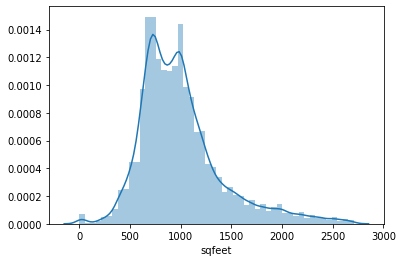

In [120]:
sns.distplot(df['sqfeet'])

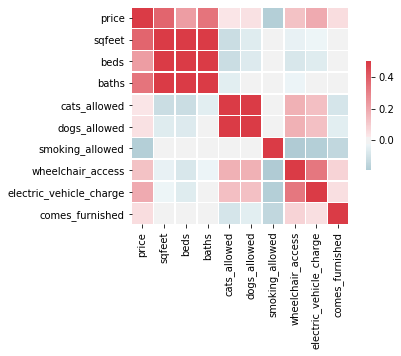

In [121]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['price', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished']].corr(),vmax = 0.5, center=0, cmap=cmap,square=True,
            linewidths=0.5, cbar_kws={"shrink": .5})

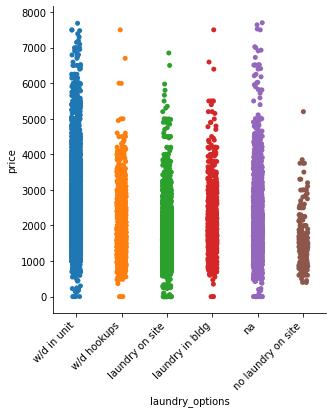

In [125]:
#Visualize distribution of price based on laundry options
chart = sns.catplot(x="laundry_options", y="price", data=df,height=5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

[Text(0, 0, 'w/d in unit'),
 Text(0, 0, 'w/d hookups'),
 Text(0, 0, 'laundry on site'),
 Text(0, 0, 'laundry in bldg'),
 Text(0, 0, 'na'),
 Text(0, 0, 'no laundry on site')]

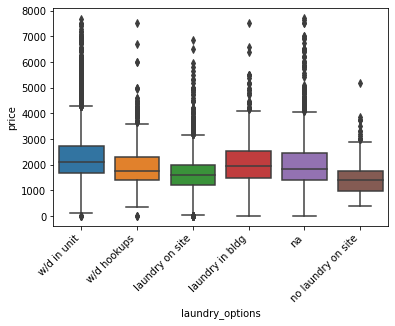

In [130]:
ax = sns.boxplot(x="laundry_options", y="price", data=df)
ax.set_xticklabels(labels=df['laundry_options'].unique(),rotation=45, horizontalalignment='right')

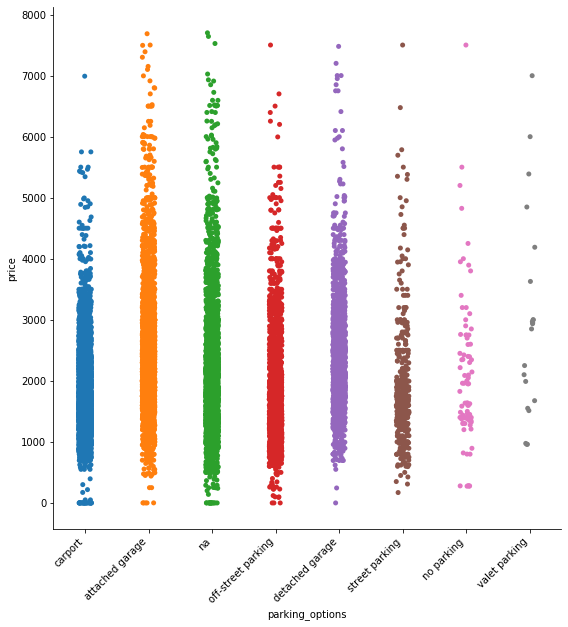

In [123]:
#Visualize distribution of price based on parking options
chart = sns.catplot(x="parking_options", y="price", data=df,height=8)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

[Text(0, 0, 'carport'),
 Text(0, 0, 'attached garage'),
 Text(0, 0, 'na'),
 Text(0, 0, 'off-street parking'),
 Text(0, 0, 'detached garage'),
 Text(0, 0, 'street parking'),
 Text(0, 0, 'no parking'),
 Text(0, 0, 'valet parking')]

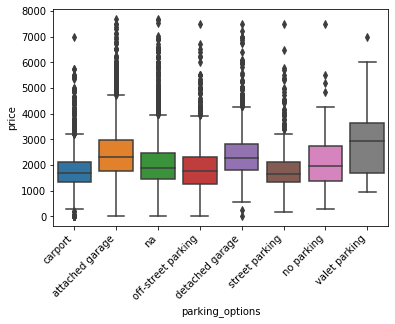

In [131]:
ax = sns.boxplot(x="parking_options", y="price", data=df)
ax.set_xticklabels(labels=df['parking_options'].unique(),rotation=45, horizontalalignment='right')

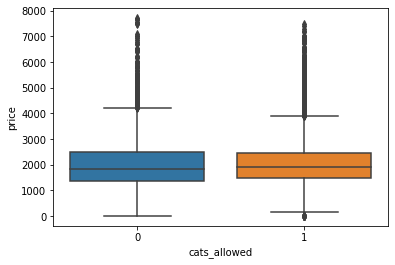

In [135]:
ax = sns.boxplot(x="cats_allowed", y="price", data=df)

In [133]:
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'description', 'lat', 'long', 'state'],
      dtype='object')

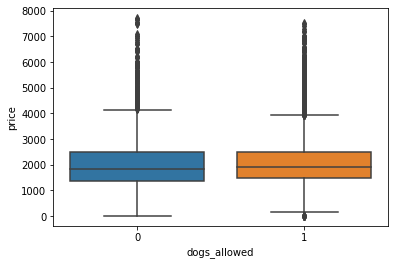

In [136]:
ax = sns.boxplot(x="dogs_allowed", y="price", data=df)

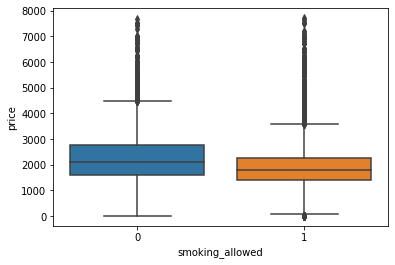

In [137]:
ax = sns.boxplot(x="smoking_allowed", y="price", data=df)

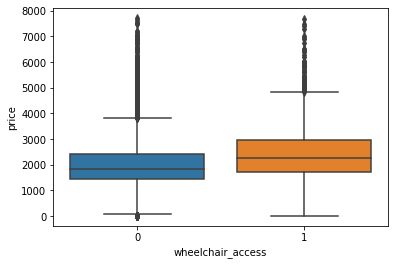

In [138]:
ax = sns.boxplot(x="wheelchair_access", y="price", data=df)

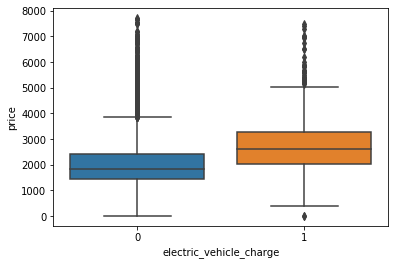

In [139]:
ax = sns.boxplot(x="electric_vehicle_charge", y="price", data=df)

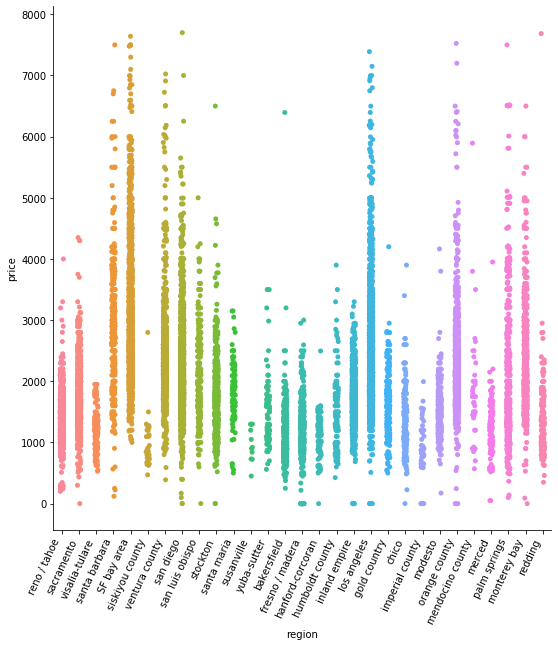

In [143]:
#Visualize distribution of price based on region
chart = sns.catplot(x="region", y="price", data=df,height=8)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

[Text(0, 0, 'reno / tahoe'),
 Text(0, 0, 'sacramento'),
 Text(0, 0, 'visalia-tulare'),
 Text(0, 0, 'santa barbara'),
 Text(0, 0, 'SF bay area'),
 Text(0, 0, 'siskiyou county'),
 Text(0, 0, 'ventura county'),
 Text(0, 0, 'san diego'),
 Text(0, 0, 'san luis obispo'),
 Text(0, 0, 'stockton'),
 Text(0, 0, 'santa maria'),
 Text(0, 0, 'susanville'),
 Text(0, 0, 'yuba-sutter'),
 Text(0, 0, 'bakersfield'),
 Text(0, 0, 'fresno / madera'),
 Text(0, 0, 'hanford-corcoran'),
 Text(0, 0, 'humboldt county'),
 Text(0, 0, 'inland empire'),
 Text(0, 0, 'los angeles'),
 Text(0, 0, 'gold country'),
 Text(0, 0, 'chico'),
 Text(0, 0, 'imperial county'),
 Text(0, 0, 'modesto'),
 Text(0, 0, 'orange county'),
 Text(0, 0, 'mendocino county'),
 Text(0, 0, 'merced'),
 Text(0, 0, 'palm springs'),
 Text(0, 0, 'monterey bay'),
 Text(0, 0, 'redding')]

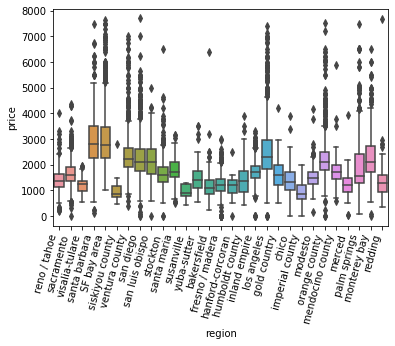

In [149]:
ax = sns.boxplot(x="region", y="price", data=df)
ax.set_xticklabels(labels=df['region'].unique(),rotation=75, horizontalalignment='right')